### Generates a Windrose from an NREL file

In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import sys
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
path = 'e:/data_turbines/'
turbines = pd.read_csv(path+'states.csv')

In [3]:
def latlon(site): # site as 62-31321-01
    s = site.split('-')[1]
    a = turbines.loc[turbines['numero_site'] == int(s)]
    c = a.reset_index(drop=True)
    Lat = c.iloc[[0]].Lat_trunc.values[0]
    Lon = c.iloc[[0]].Lon_trunc.values[0]
    Sta = c.iloc[[0]].state.values[0]
   
    return (' [' + str(Lat)+', '+ str(Lon) +'] '+ str(Sta))

In [4]:
def plot_windrose(site):
   # 0:wind_speed, 1:temperature, 2:density,   3:pressure, 4: wind_direction (sin), 5: wind_direction (cos), 7: hour, 8: month
   t_s_multivariate = np.load(path+site+'.npy')

   # we extract wind speed and sin cos
   ts_wind_speed = t_s_multivariate[:,0]
   ts_sin = t_s_multivariate[:,4]
   ts_cos = t_s_multivariate[:,5]
   ts_degree = np.zeros(len(ts_sin))
   for i in range(0,len(ts_sin)):
      phi = math.atan(ts_sin[i]/ts_cos[i])
      phi = abs(phi)*180/math.pi
      if ts_sin[i] > 0 and ts_cos[i] > 0 : # quadrant 1 (counterclockwise)
         pass
      elif ts_sin[i] < 0 and ts_cos[i] > 0: # quadrant 2 
         phi = 360 - phi
      elif ts_sin[i] < 0 and ts_cos[i] < 0: # quadrant 3 
         phi = 180 + phi
      elif ts_sin[i] < 0 and ts_cos[i] > 0: # quadrant 4 
         phi = 180 - phi
      ts_degree[i] = phi
   vientospeed     = ts_wind_speed
   vientodirection = ts_degree
   #vientospeed = np.nan_to_num(vientospeed)
   #vientodirection = np.nan_to_num(vientodirection) # hay algun nan en los datos-eliminar
   title = 'WindRose '+ site + latlon(site)
   ax = WindroseAxes.from_ax()
   ax.bar(vientodirection, vientospeed, normed=True, opening=0.8, edgecolor='white')
   ax.set_title(title, fontname="Consolas")
   ax.set_legend()
   plt.savefig('Windrose-'+site+'.pdf')
   plt.show()


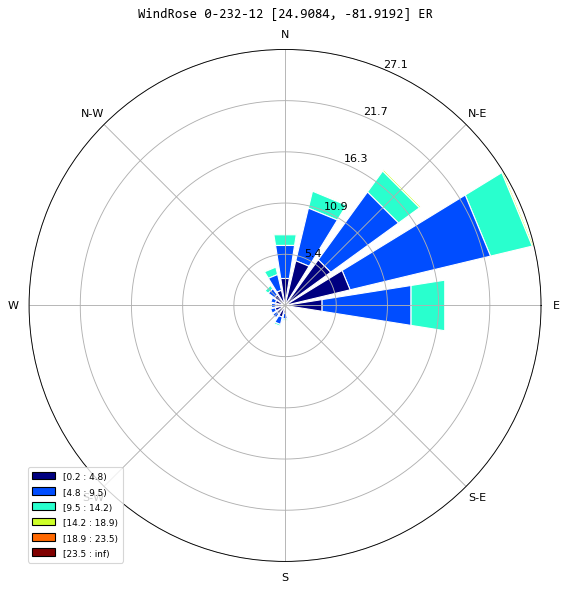

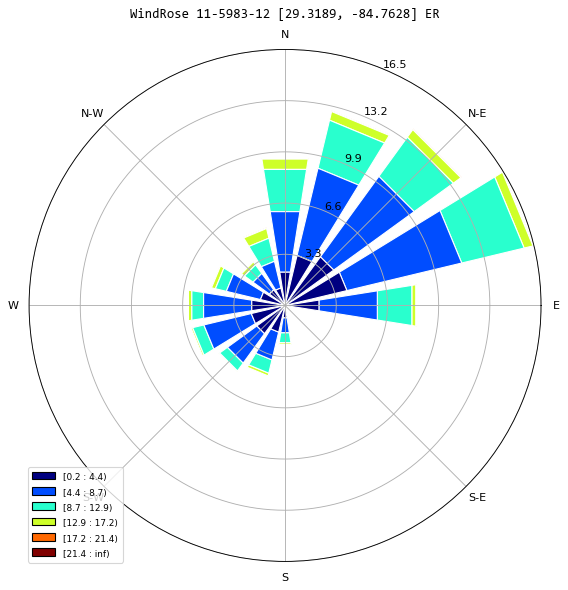

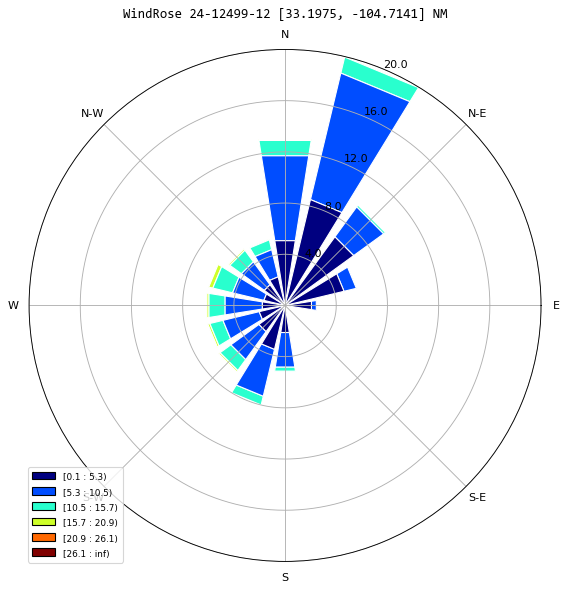

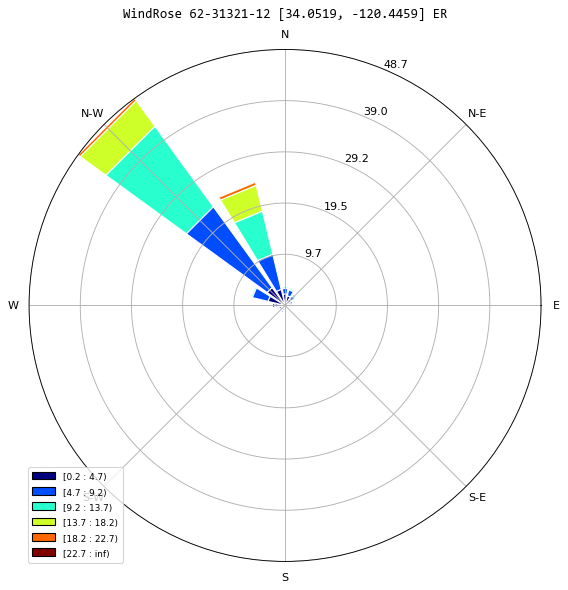

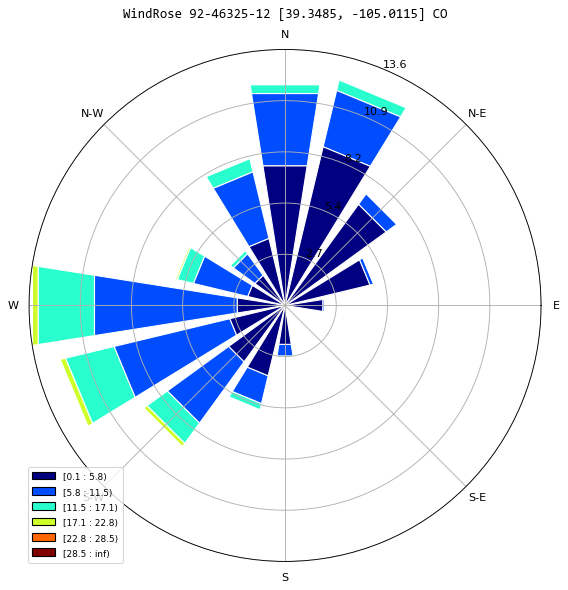

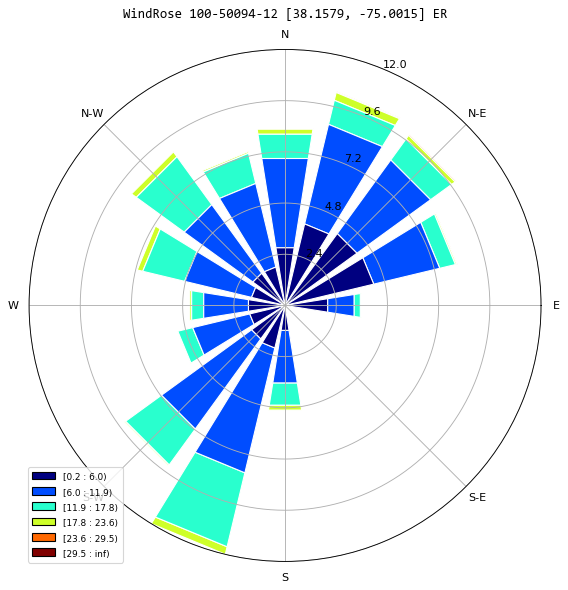

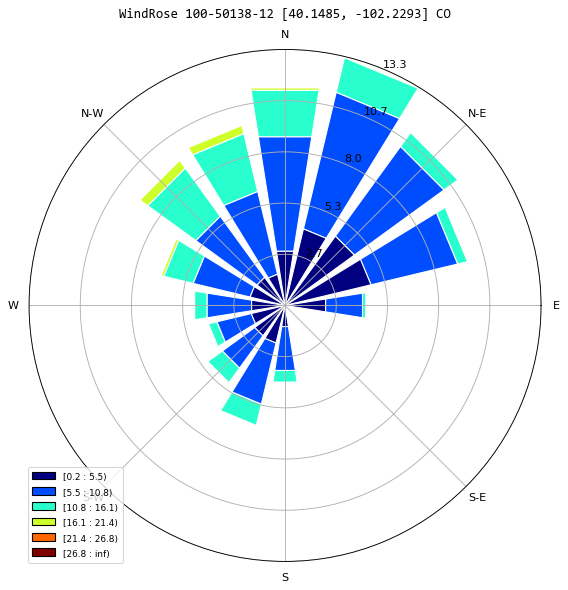

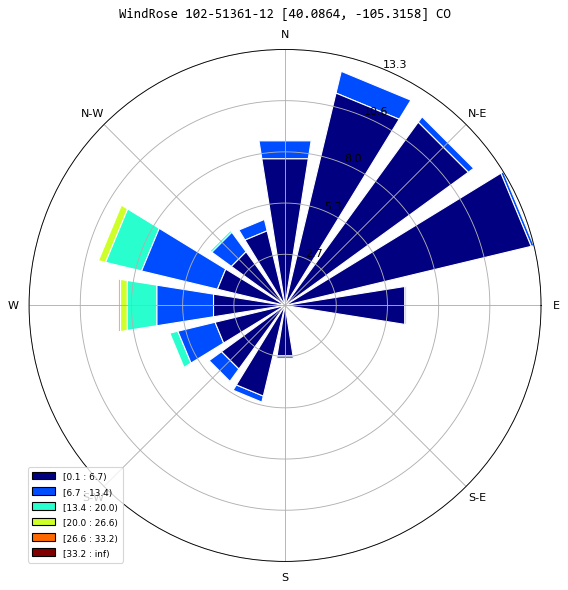

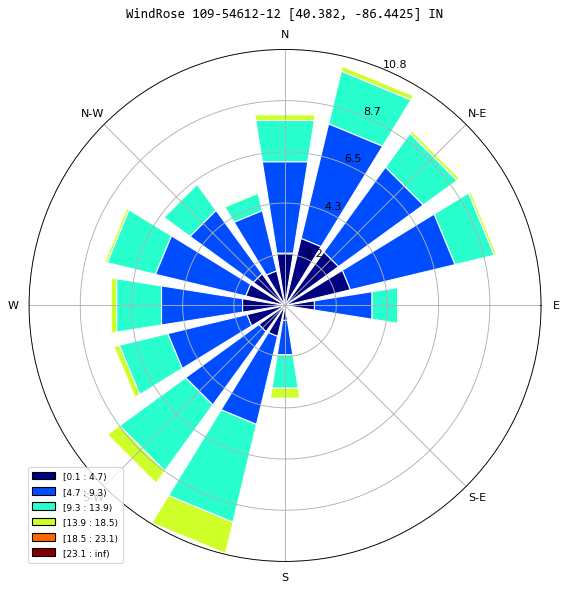

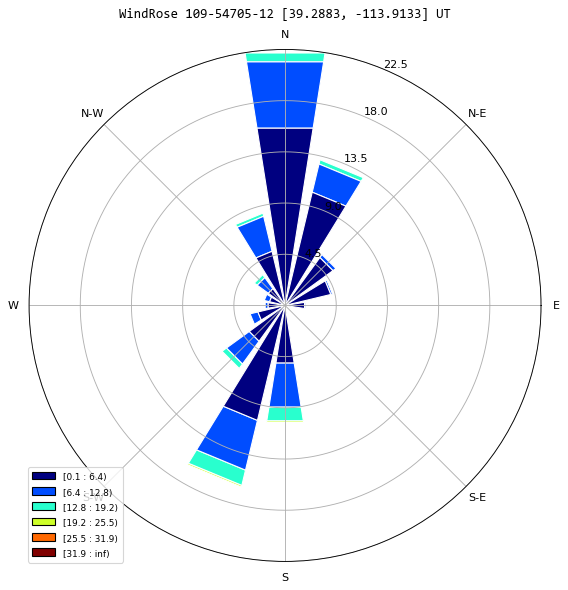

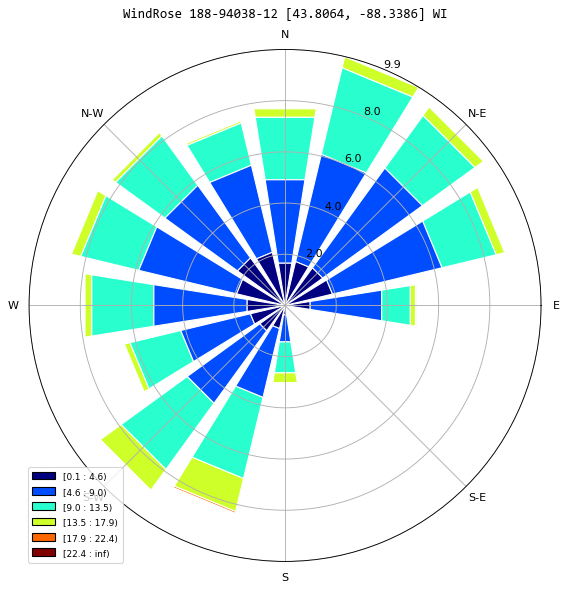

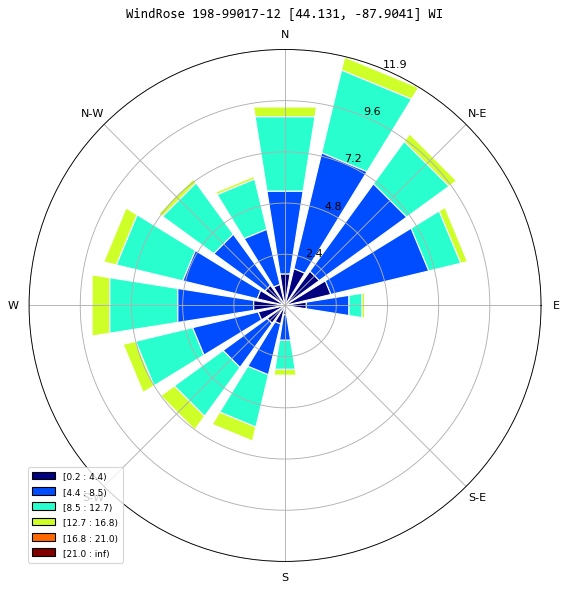

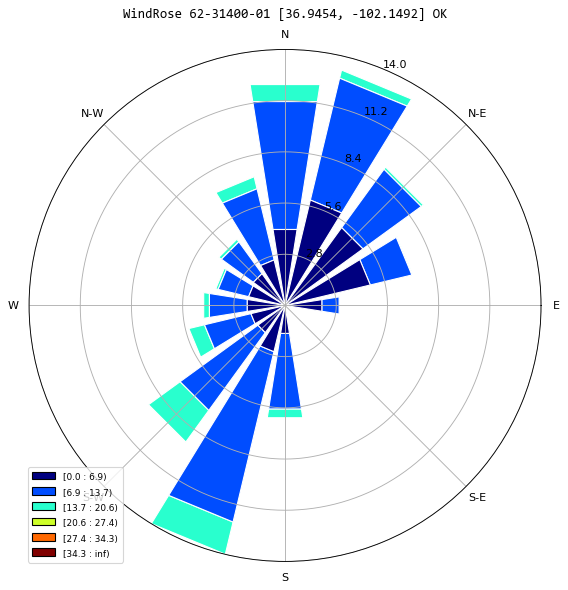

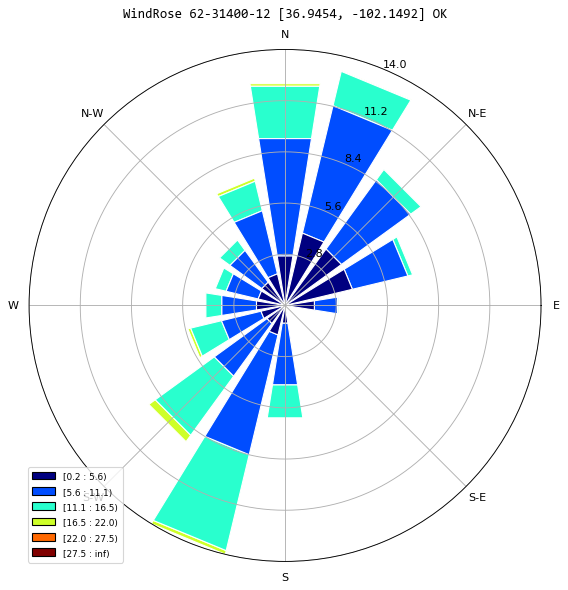

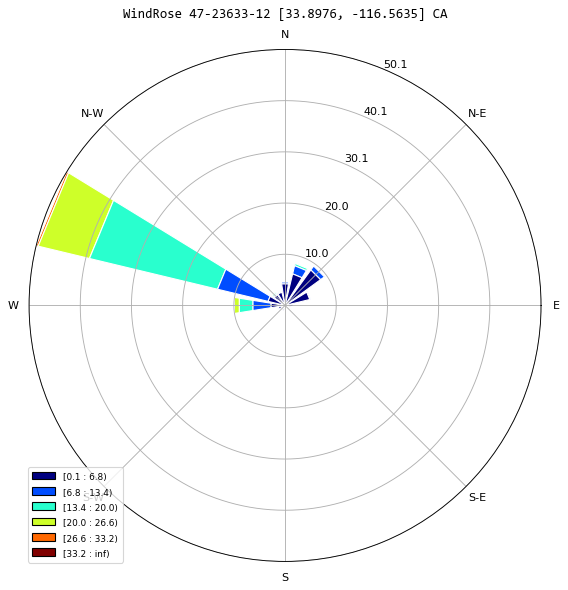

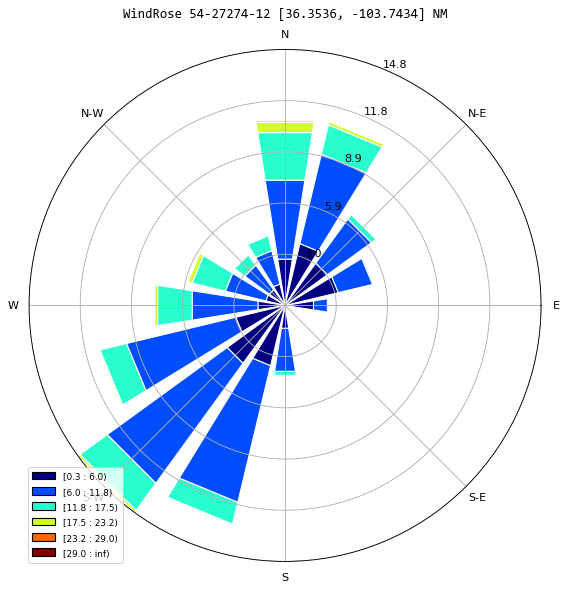

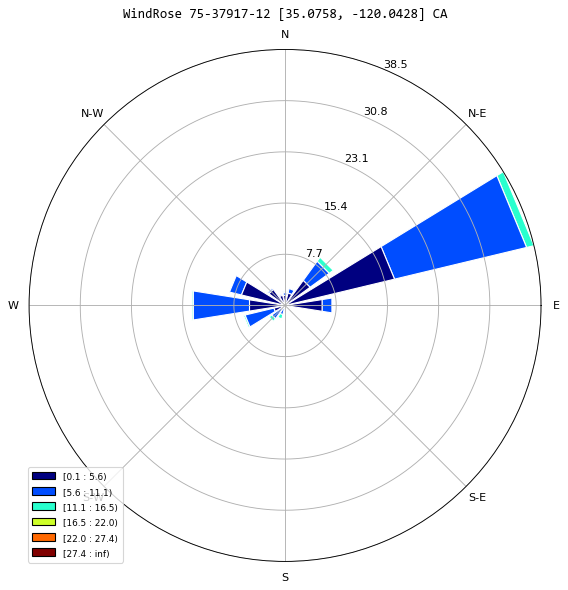

In [20]:

sites = ['0-232-12','11-5983-12','24-12499-12','62-31321-12','92-46325-12',
         '100-50094-12','100-50138-12','102-51361-12','109-54612-12','109-54705-12',
         '188-94038-12','198-99017-12','62-31400-01', '62-31400-12', '47-23633-12' , '54-27274-12',
         '75-37917-12']

for s in sites:
   plot_windrose(s)

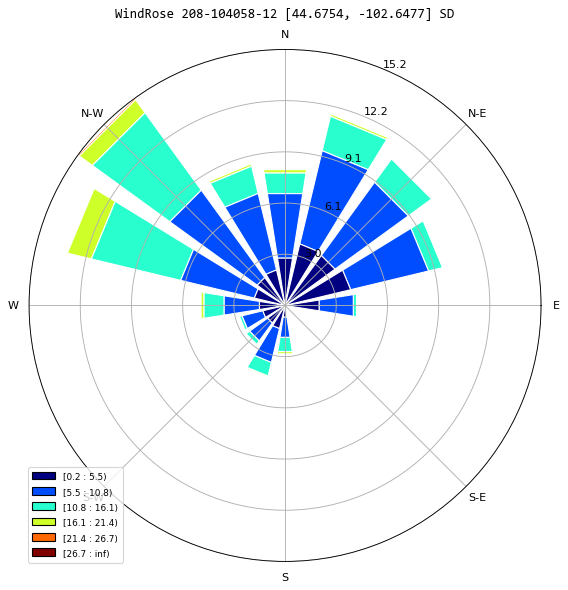

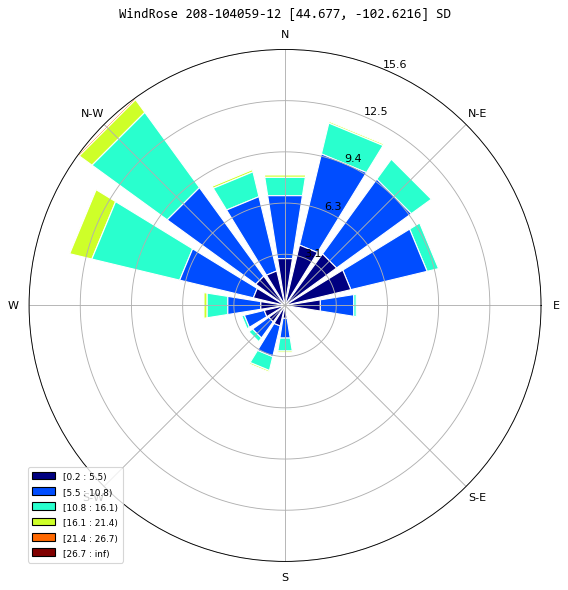

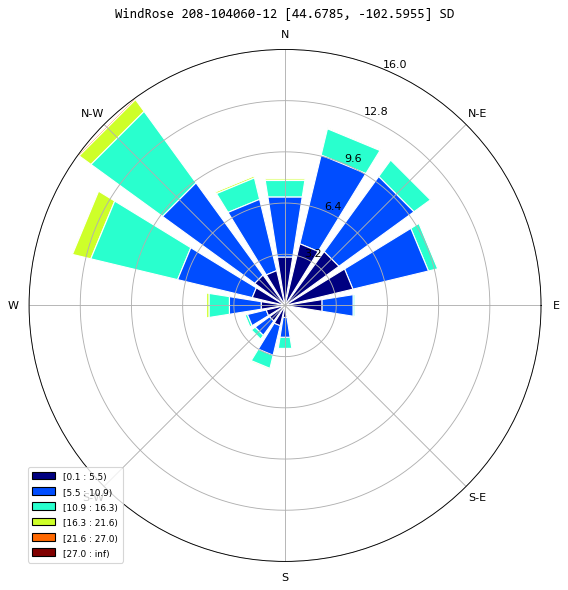

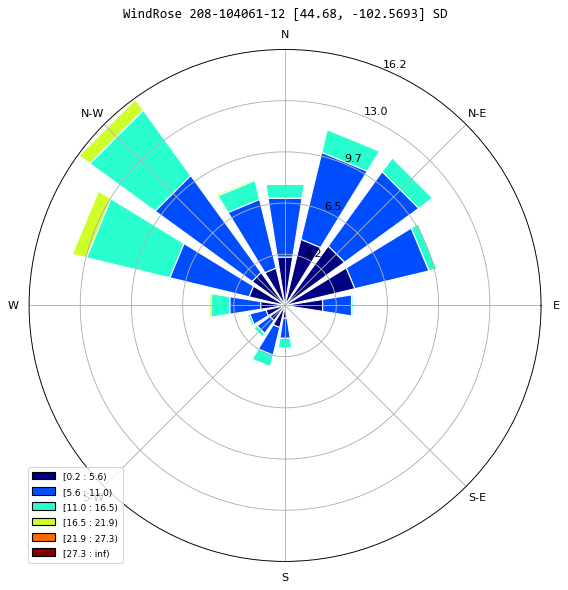

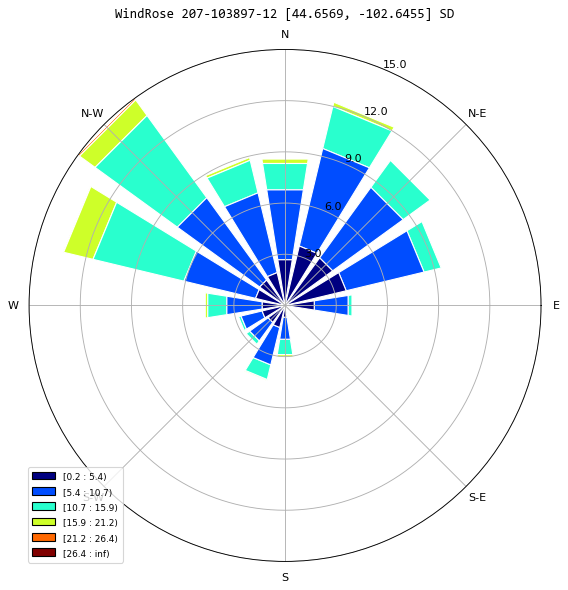

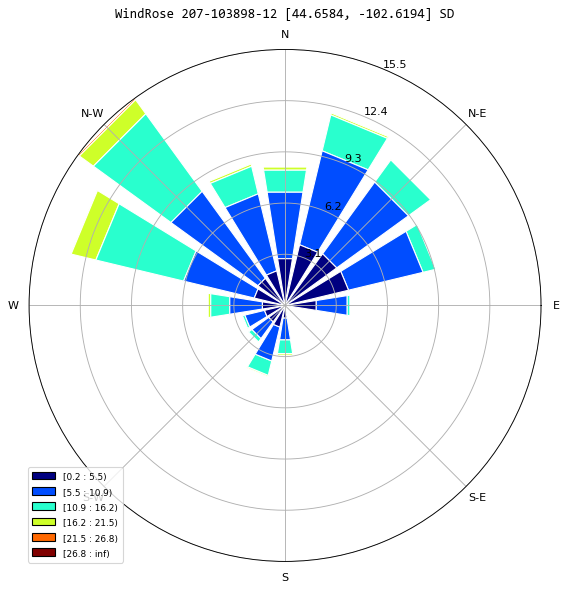

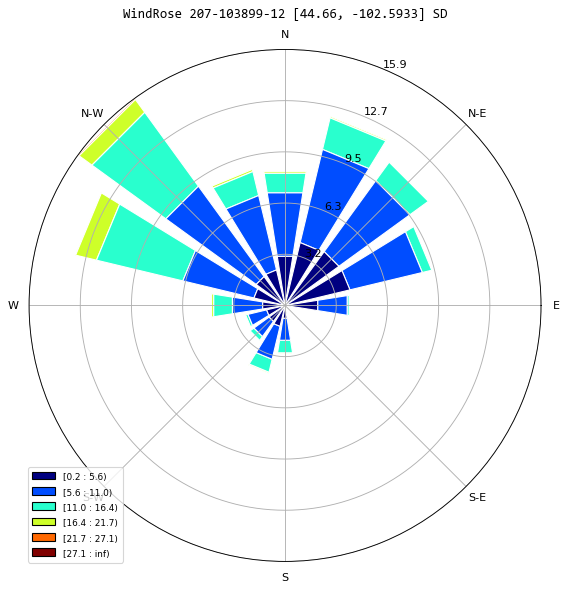

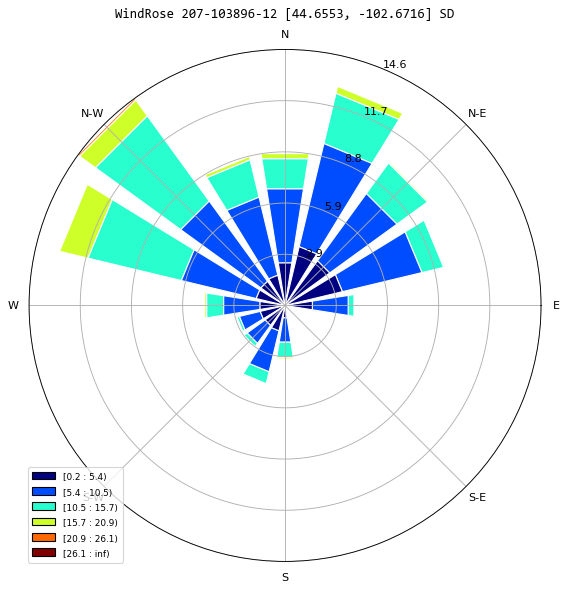

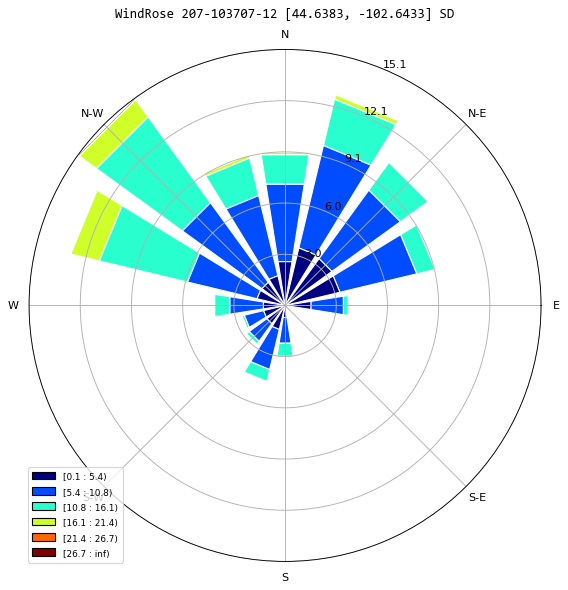

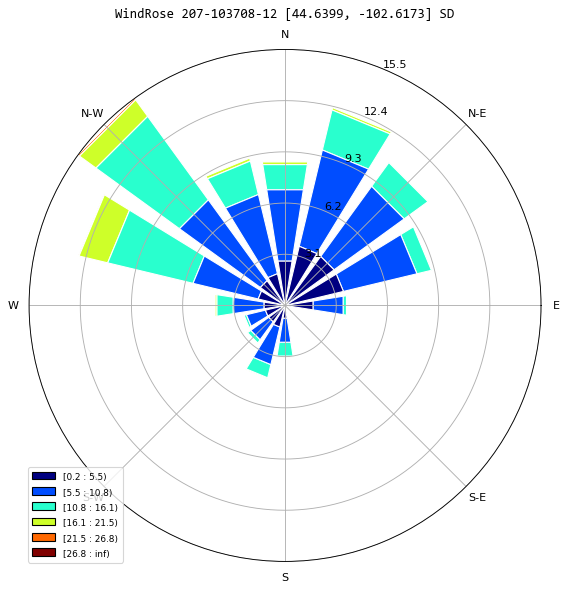

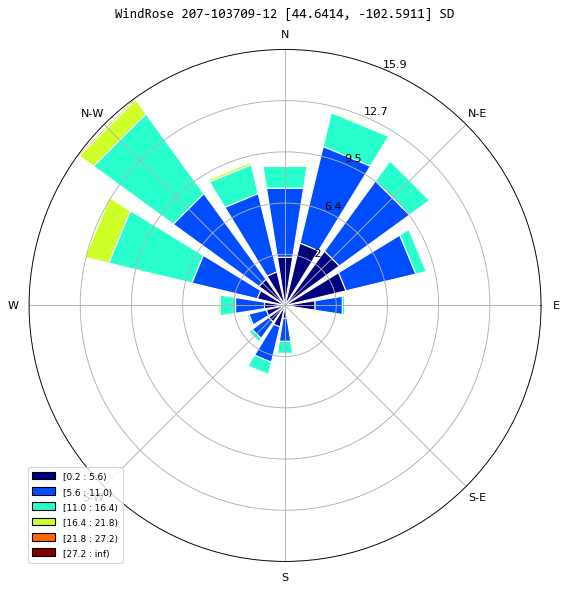

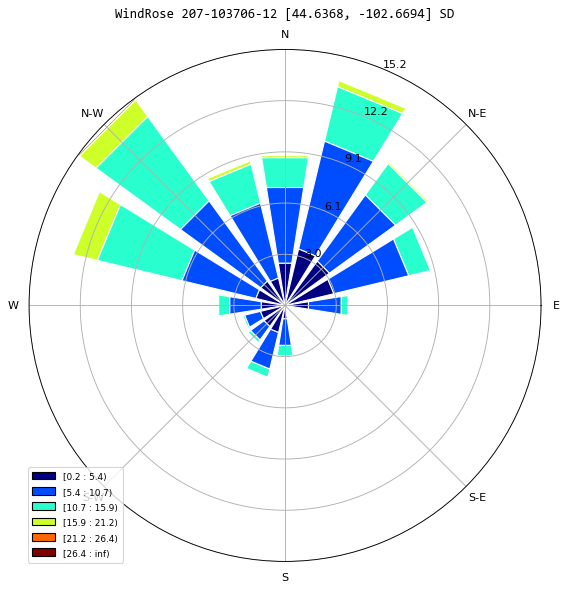

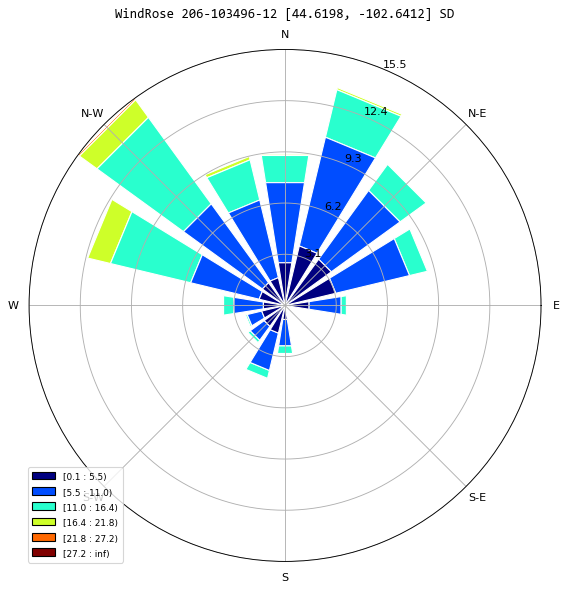

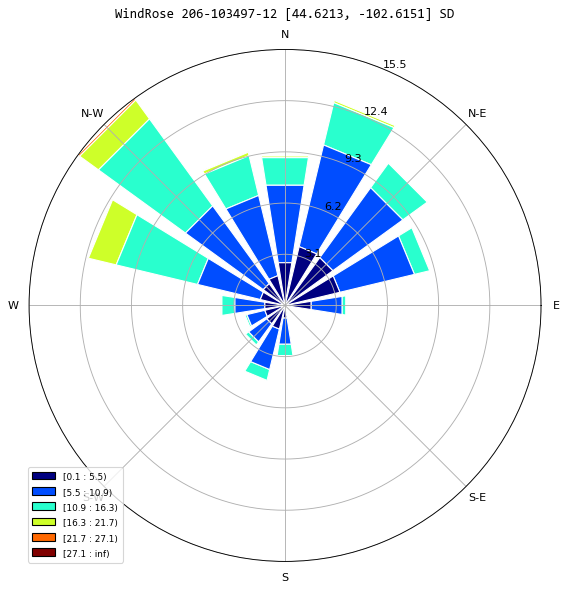

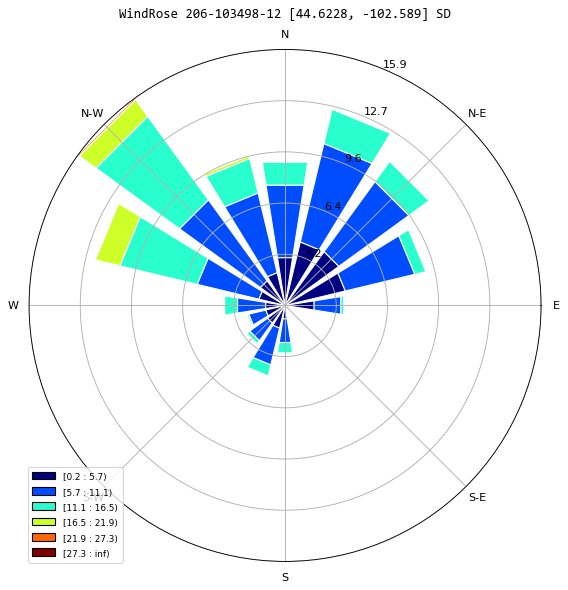

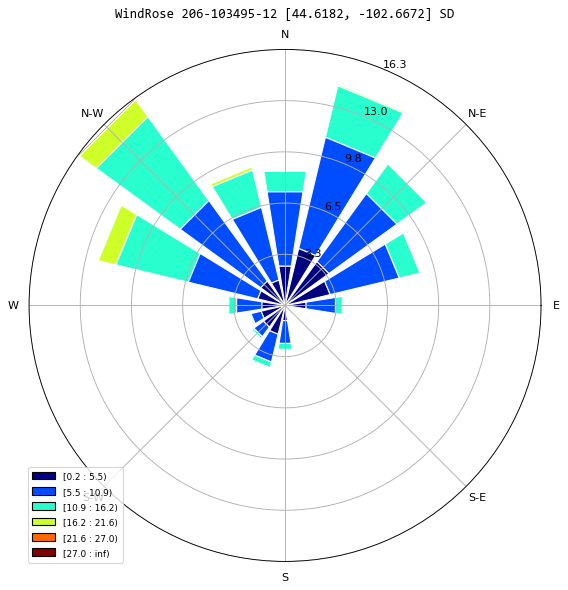

In [8]:
sites = ['208-104058-12','208-104059-12','208-104060-12','208-104061-12',
        '207-103897-12','207-103898-12','207-103899-12','207-103896-12',
        '207-103707-12','207-103708-12','207-103709-12','207-103706-12',
        '206-103496-12','206-103497-12','206-103498-12','206-103495-12']

for s in sites:
   plot_windrose(s)